<a href="https://colab.research.google.com/github/kay0710/SOCAR-AI-BOOT-CAMP/blob/main_socar_class/Kaggle_prac/1_titanic_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle - Titanic(Machine Learning from Disaster)
Link: https://www.kaggle.com/competitions/titanic/overview


## Overview


1. Goal
> It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

2. Metric
> Your score is the percentage of passengers you correctly predict. This is known as accuracy.

3. Data description
>Overview
>> The data has been split into two groups:
>>
>> training set (train.csv)
>>
>> test set (test.csv)
> 
> The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
> 
> The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
>
> ---
>Variables Note
>
>>pclass: A proxy for socio-economic status (SES)
>>
>>1st = Upper
>>
>>2nd = Middle
>>
>>3rd = Lower
>>
>>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
>>
>>sibsp: The dataset defines family relations in this way...
>>
>>Sibling = brother, sister, stepbrother, stepsister
>>
>>Spouse = husband, wife (mistresses and fiancés were ignored)
>>
>>parch: The dataset defines family relations in this way...
>>
>>Parent = mother, father
>>
>>Child = daughter, son, stepdaughter, stepson
>>
>>Some children travelled only with a nanny, therefore parch=0 for them.
>
> ---
>Data dictionary
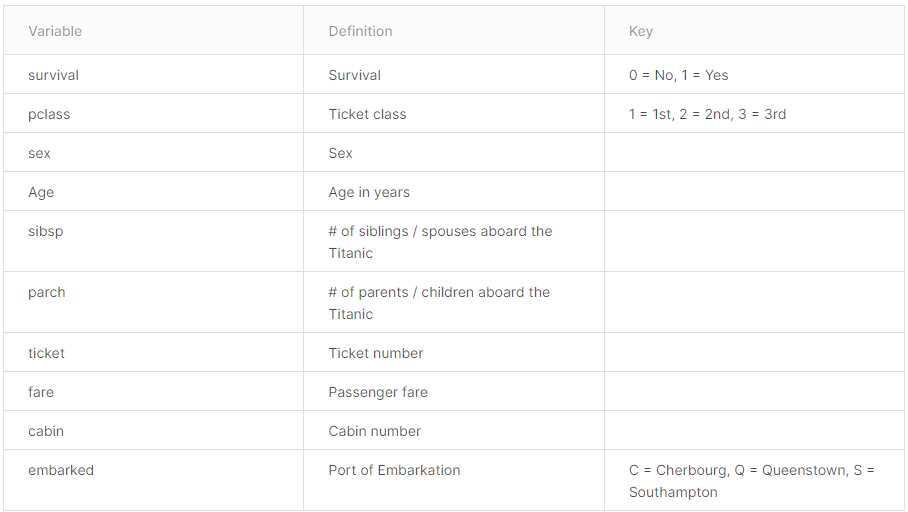

## Data Analysis

In [10]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('/content/driver/MyDrive/Colab Notebooks/kaggle/titanic/data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking missing value
print(train.info())
print("\n")
print(train.isnull().sum())

'''
Missing value
>> Age, Cabin, Embarked
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: in

'\nMissing value\n>> Age, Cabin, Embarked\n'

In [5]:
# create chart for analysis
## correlation between 'Survived' & 'Colum of data'

# define functions
def show_pChart(df, col_name):
  colname_survived = crosstabMaker(train, col_name)
  pChartMaker(colname_survived)
  return colname_survived

def crosstabMaker(df, col_name):
  feature_survived = pd.crosstab(df[col_name], df['Survived'])
  feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
  return feature_survived

def pChartMaker(feature_survived):
  fRows, fCols = feature_survived.shape
  pCol = 3
  pRow = (fRows/pCol + fRows%pCol)
  plot_height = pRow * 2.5
  plt.figure(figsize=(8, plot_height))

  for row in range(fRows):
    plt. subplot(pRow, pCol, row+1)
    idx_name = feature_survived.index[row]
    plt.pie(feature_survived.loc[idx_name], labels=feature_survived.loc[idx_name], autopct='%1.1f%%')
    plt.title("{0:}' survived".format(idx_name))

  plt.show()

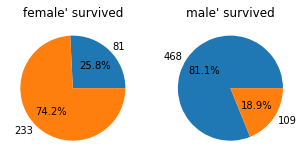

' female > male '

In [6]:
# Sex
s = show_pChart(train, 'Sex')
s
''' female > male '''

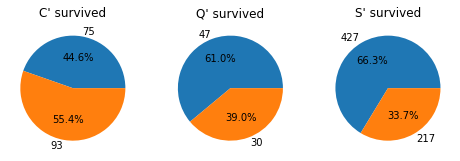

' C > Q > S '

In [7]:
# Emaberked
e = show_pChart(train, "Embarked")
e
''' C > Q > S '''

In [8]:
# Name
## extract "Mr. Mrs. Miss...."
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [9]:
# classify 'Title'
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Dona', 'Jonkheer'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

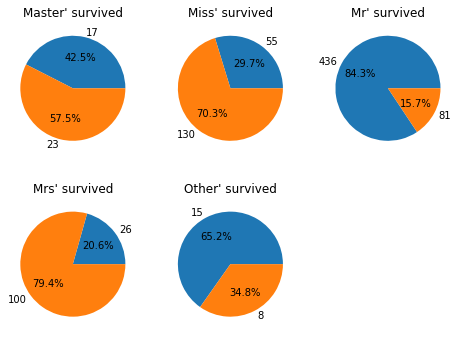

' Mrs > Miss > Master > Other > Mr '

In [10]:
t = show_pChart(train, 'Title')
t
''' Mrs > Miss > Master > Other > Mr '''

In [11]:
# Age
## fill the 'missing value' with 'average age' (calculate with 'Title' & 'Age')
## divide into 8-sections & create AgeCategory
### pd.qcut >>> equal-size buckets (same count // different length)
### pd.cut >>> equal-length buckets (same length // different count)

meanAge = train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
  nullIndex = train[(train.Title == index) & (train.Age.isnull())].index
  train.loc[nullIndex, 'Age'] = row[0]

train['AgeCategory'] = pd.qcut(train.Age, 8, labels=range(1,9))
train.AgeCagtegory = train.AgeCategory.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


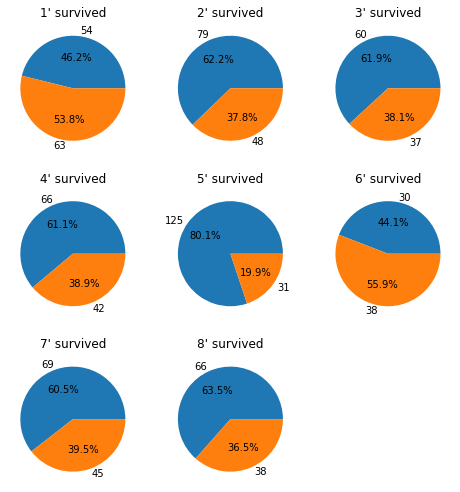

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [12]:
a = show_pChart(train, 'AgeCategory')
a

In [13]:
# cabin
## fill the 'missing value' with 'N'
## create CabinCategory

train.Cabin.fillna('N', inplace=True)
train['CabinCategory'] = train['Cabin'].str.slice(start=0, stop=1)
train['CabinCategory'] = train['CabinCategory'].map({ "N":0, "C":1, "B":2, "D":3, "E":4, "A":5, "F":6, "G":7, "T":8 })

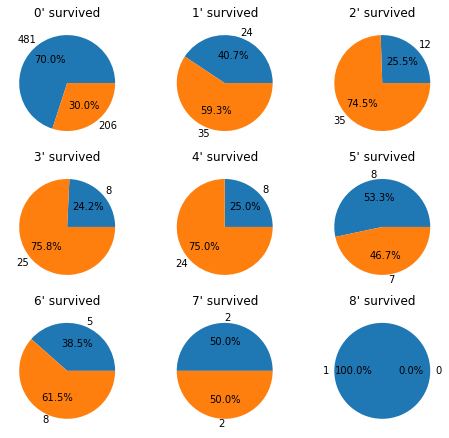

' ??? '

In [14]:
c = show_pChart(train, 'CabinCategory')
c
''' ??? '''

In [15]:
# Fare
## fill the 'missing value' with '0'
## divide into 8-sections & create FareCategory

train.Fare.fillna(0)
train['FareCategory'] = pd.qcut(train.Fare, 8, labels=range(1,9))
train.FareCategory = train.FareCategory.astype(int)

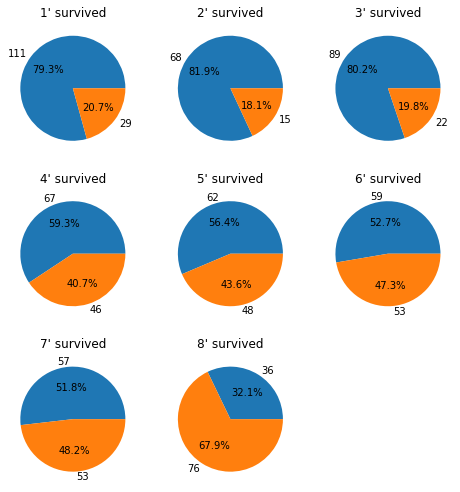

' propotional to the fare '

In [16]:
f = show_pChart(train, 'FareCategory')
f
''' propotional to the fare '''

In [17]:
# SibSp, Parch
## create 'family' & 'IsAlone'

train['Family'] = train['SibSp'] + train['Parch'] + 1
train.loc[train['Family'] > 4, 'Family'] = 5

train['IsAlone'] = 1
train.loc[train['Family'] > 1, 'IsAlone'] =0

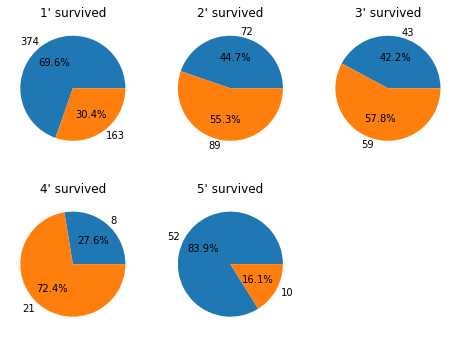

' 4 > 3 > 2 > 1 > 5 '

In [18]:
f = show_pChart(train, 'Family')
f
''' 4 > 3 > 2 > 1 > 5 '''

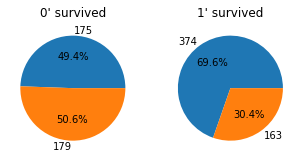

' Alone > Family '

In [19]:
isa = show_pChart(train, 'IsAlone')
isa
''' Alone > Family ''' 

In [24]:
# Ticket
## create 'TicketCategory
### factorize: mapping object to value (enumeration or category)

train['TicketCategory'] = train.Ticket.str.split()
train['TicketCategory'] = [i[-1][0] for i in train['TicketCategory']]
train['TicketCategory'] = train['TicketCategory'].replace(['8', '9', 'L'], '8')
train['TicketCategory'] = pd.factorize(train['TicketCategory'])[0] + 1

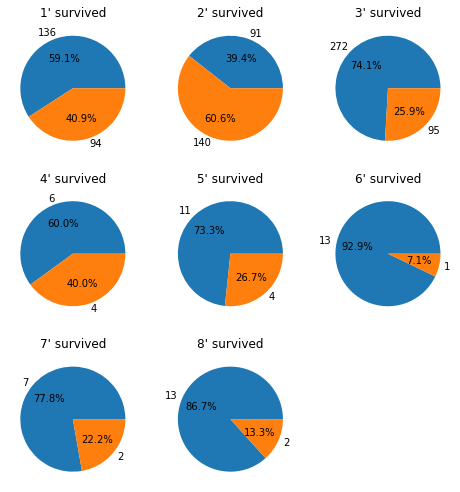

Survived,Dead,Alive
TicketCategory,,
1,136,94
2,91,140
3,272,95
4,6,4
5,11,4
6,13,1
7,7,2
8,13,2


In [25]:
t = show_pChart(train, 'TicketCategory')
t

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,CabinCategory,FareCategory,Family,IsAlone,TicketCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,3,0,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,7,1,8,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss,4,0,3,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,6,1,7,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,6,0,3,1,1,3


## Data preprocessing

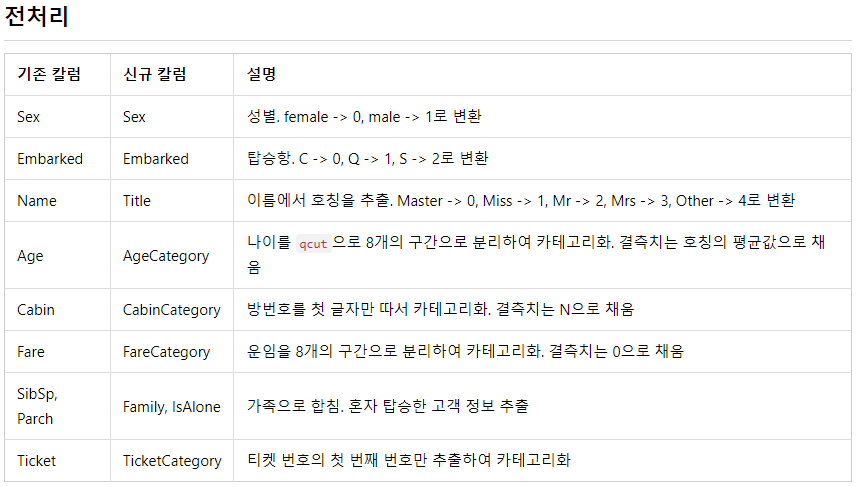

In [45]:
import pandas as pd

train = pd.read_csv('/content/driver/MyDrive/Colab Notebooks/kaggle/titanic/data/train.csv')
test = pd.read_csv('/content/driver/MyDrive/Colab Notebooks/kaggle/titanic/data/test.csv')

In [46]:
def feature_engineering(df):
  # Sex
  df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

  # Embarked
  df.Embarked.fillna('S', inplace=True)
  df['Embarked'] = df['Embarked'].map({'C': 0, 'Q':1, 'S':2})

  # Title
  df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
  df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Dona', 'Jonkheer'], 'Other')
  df['Title'] = df['Title'].replace('Mlle', 'Miss')
  df['Title'] = df['Title'].replace('Mme', 'Mrs')
  df['Title'] = df['Title'].replace('Ms', 'Miss')
  df['Title'] = df['Title'].replace({'Master': 0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

  # Age
  meanAge = df[['Title', 'Age']].groupby(['Title']).mean()
  for index, row in meanAge.iterrows():
    nullIndex = df[(df.Title == index) & (df.Age.isnull())].index
    df.loc[nullIndex, 'Age'] = row[0]

  df['AgeCategory'] = pd.qcut(df.Age, 8, labels=range(1,9))
  df.AgeCategory = df.AgeCategory.astype(int)

  # Cabin
  df.Cabin.fillna('N', inplace=True)
  df['CabinCategory'] = df['Cabin'].str.slice(start=0, stop=1)
  df['CabinCategory'] = df['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

  # Fare
  df.Fare.fillna(0, inplace=True)
  df['FareCategory'] = pd.qcut(df.Fare, 8, labels=range(1,9))
  df.FareCategory = df.FareCategory.astype(int)

  #SibSp, Parch
  df['Family'] = df['SibSp'] + df['Parch'] + 1
  df.loc[df['Family'] > 4, 'Family'] = 5

  df['IsAlone'] = 1
  df.loc[df['Family'] > 1, 'IsAlone'] = 0

  # Ticket
  df['TicketCategory'] = df.Ticket.str.split()
  df['TicketCategory'] = [i[-1][0] for i in df ['TicketCategory']]
  df['TicketCategory'] = df['TicketCategory'].replace(['8', '9', 'L'], '8')
  df['TicketCategory'] = pd.factorize(df['TicketCategory'])[0] + 1

  df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

  return df

In [47]:
train = feature_engineering(train)
test = feature_engineering(test)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Embarked        891 non-null    int64
 4   Title           891 non-null    int64
 5   AgeCategory     891 non-null    int64
 6   CabinCategory   891 non-null    int64
 7   FareCategory    891 non-null    int64
 8   Family          891 non-null    int64
 9   IsAlone         891 non-null    int64
 10  TicketCategory  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Sex             418 non-null    int64
 2   Embarked      

## Machine learning

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature = train.drop('Survived', axis=1).values
label = train['Survived'].values

In [50]:
# serparate train data set (train : validation = 6 : 4)
## <parameters>
## test_size: seperation rate
## stratify: seperatio point
## random_state: random seed

x_train, x_valid, y_train, y_valid = train_test_split(feature, label, test_size=0.4, stratify=label, random_state=0)

In [51]:
# Random Forest Classifier - 1

rf = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=5, oob_score=True, random_state=10)
rf.fit(x_train, y_train)
prediction = rf.predict(x_valid)

length = y_valid.shape[0]
accuracy = accuracy_score(prediction, y_valid)
print(f'Total occupants: {length}')
print(f'Accuracy: {accuracy * 100:.3f}%')

Total occupants: 357
Accuracy: 82.913%


In [52]:
# Random Forest Classifier - 2
## Run-time type : None (1hr 14min 7sec)


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

RF_Classifier = RandomForestClassifier()

RF_Paramgrid = {
    'max_depth': [6, 8, 10, 15],
    'n_estimators': [50, 100, 300, 500, 700, 800, 900],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 7, 15, 30],
    'min_samples_leaf': [1, 15, 30, 60],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

k_fold = StratifiedKFold(n_splits=5)
RF_Classifiergrid = GridSearchCV(RF_Classifier, param_grid=RF_Paramgrid, cv=k_fold, scoring='accuracy', n_jobs=-1, verbose=1)

RF_Classifiergrid.fit(x_train, y_train)

rf = RF_Classifiergrid.best_estimator_

'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

RF_classifier = RandomForestClassifier()

RF_paramgrid = {
    'max_depth' : [6, 8, 10, 15],
    'n_estimators': [50, 100, 300, 500, 700, 800, 900],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 7, 15, 30],
    'min_samples_leaf': [1, 15, 30, 60],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
    }

k_fold = StratifiedKFold(n_splits=5)
RF_classifiergrid = GridSearchCV(RF_classifier, param_grid = RF_paramgrid, cv=k_fold, scoring="accuracy", n_jobs= -1, verbose=1)

RF_classifiergrid.fit(x_train, y_train)

rf = RF_classifiergrid.best_estimator_

print(rf)
'''

Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import StratifiedKFold\n\nRF_classifier = RandomForestClassifier()\n\nRF_paramgrid = {\n    \'max_depth\' : [6, 8, 10, 15],\n    \'n_estimators\': [50, 100, 300, 500, 700, 800, 900],\n    \'max_features\': [\'sqrt\'],\n    \'min_samples_split\': [2, 7, 15, 30],\n    \'min_samples_leaf\': [1, 15, 30, 60],\n    \'bootstrap\': [True, False],\n    \'criterion\': [\'gini\', \'entropy\']\n    }\n\nk_fold = StratifiedKFold(n_splits=5)\nRF_classifiergrid = GridSearchCV(RF_classifier, param_grid = RF_paramgrid, cv=k_fold, scoring="accuracy", n_jobs= -1, verbose=1)\n\nRF_classifiergrid.fit(x_train, y_train)\n\nrf = RF_classifiergrid.best_estimator_\n\nprint(rf)\n'

In [53]:
# Bset score
print("Best Score: ", RF_Classifiergrid.best_score_)

# Best Parameter
print("Best Parameter: ", RF_Classifiergrid.best_params_)

# Best Model
print("Best Model: ", RF_Classifiergrid.best_estimator_)

Best Score:  0.8333098219008994
Best Parameter:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 800}
Best Model:  RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_split=7, n_estimators=800)


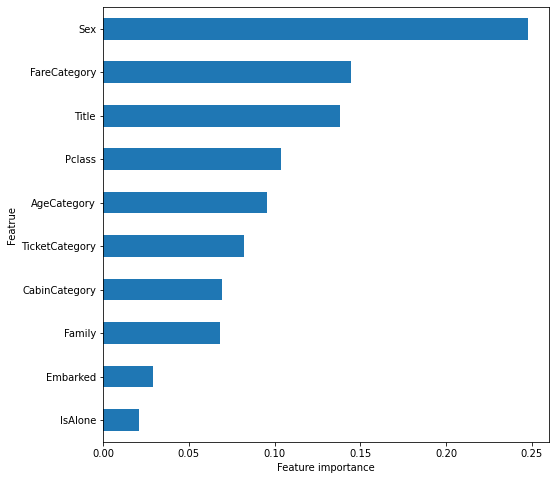

In [54]:
# Feature Importances
import matplotlib.pyplot as plt
from pandas import Series

feature_importances = rf.feature_importances_
fi = Series(feature_importances, index=train.drop(['Survived'], axis=1).columns)

plt.figure(figsize=(8,8))
fi.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Featrue')
plt.show()

## Algorithm Test
> RandomForestClassifier
>
> SVC
>
> LogisticRegression
>
>DecisionTreeClassifier
>
>KNeighborsClassifier
>
>GaussianNB

In [55]:
# Algorithm for Supervised learning

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature = train.drop('Survived', axis=1).values
label = train['Survived'].values
x_train, x_valid, y_train, y_valid = train_test_split(feature, label, test_size=0.4, stratify=label, random_state=0)

def ml_fit(model):
  model.fit(x_train, y_train)
  prediction = model.predict(x_valid)
  accuracy = accuracy_score(prediction, y_valid)
  print(model)
  print(f'Total accupants: {y_valid.shape[0]}')
  print(f'Accuracy {accuracy * 100:.3f}%')
  return model
  
'''
  # 지도학습 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data 분리 
data = train.drop('Survived', axis=1).values
target = train['Survived'].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

# 모델 적용 함수 
def ml_fit(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'Total accupants: {y_valid.shape[0]}')
    print(f'Accuracy {accuracy * 100:.3f}%')
    return model
    '''

"\n  # 지도학습 모델 import\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.naive_bayes import GaussianNB\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# data 분리 \ndata = train.drop('Survived', axis=1).values\ntarget = train['Survived'].values\nx_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)\n\n# 모델 적용 함수 \ndef ml_fit(model):\n    model.fit(x_train, y_train)\n    prediction = model.predict(x_valid)\n    accuracy = accuracy_score(prediction, y_valid)\n    print(model)\n    print(f'Total accupants: {y_valid.shape[0]}')\n    print(f'Accuracy {accuracy * 100:.3f}%')\n    return model\n    "

In [59]:
model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier()
Total accupants: 357
Accuracy 80.112%
LogisticRegression()
Total accupants: 357
Accuracy 79.832%
SVC()
Total accupants: 357
Accuracy 81.513%
KNeighborsClassifier()
Total accupants: 357
Accuracy 76.471%
GaussianNB()
Total accupants: 357
Accuracy 73.389%
DecisionTreeClassifier()
Total accupants: 357
Accuracy 77.311%


In [61]:
model = ml_fit(RandomForestClassifier(bootstrap=True, max_depth=8, oob_score=True, random_state=10, criterion='entropy', max_features='sqrt',
                       min_samples_split=7, n_estimators=800, min_samples_leaf=1))

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_split=7, n_estimators=800, oob_score=True,
                       random_state=10)
Total accupants: 357
Accuracy 82.353%
